# Example of an unbinned maximum likelihood fit with iminuit

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit

In [114]:
# x = np.loadtxt("data/data_ml_fit.txt")
x = np.loadtxt("https://www.physi.uni-heidelberg.de/~reygers/lectures/2020/smipp/data_ml_fit.txt")

In [115]:
def f(x, a, b):
    """normalized fit function"""
    xmin = -0.95
    xmax = 0.95
    return (6 * (1 + a * x + b * x * x)) / \
            ((xmax - xmin) * (3 * a * (xmax + xmin) + \
            2 * (3 + b * (xmax * xmax + xmax * xmin + xmin * xmin))))

In [116]:
def negative_log_likelihood(a, b):
    p = np.log(f(x, a, b))
    return -np.sum(p)

In [117]:
m = Minuit(negative_log_likelihood, a=1, b=1)
m.errordef = Minuit.LIKELIHOOD

In [118]:
m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 606.5                      │              Nfcn = 50               │
│ EDM = 2.23e-08 (Goal: 0.0001)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   0.53    │   0.08    │            │            │         │         │       │
│ 1 │ b    │   0.51    │   0.16    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────┐
│   │       a       b │
├───┼─────────────────┤
│ a │ 0.00571 0.00575 │
│ b │ 0.00575  0.0255 │
└───┴─────────────────┘

In [119]:
# covariance matrix
m.covariance

┌───┬─────────────────┐
│   │       a       b │
├───┼─────────────────┤
│ a │ 0.00571 0.00575 │
│ b │ 0.00575  0.0255 │
└───┴─────────────────┘

In [120]:
# correlation matrix
m.covariance.correlation()

┌───┬─────────────┐
│   │     a     b │
├───┼─────────────┤
│ a │     1 0.476 │
│ b │ 0.476     1 │
└───┴─────────────┘

In [121]:
# function with fitted parameters
xf = np.linspace(-1, 1., 1000)
a_fit = m.values['a']
b_fit = m.values['b']
yf = f(xf, a_fit, b_fit)

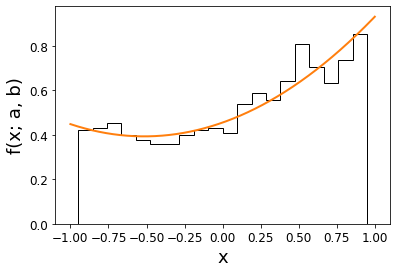

In [122]:
plt.hist(x, bins=20, density=True, ec="black", histtype='step');
plt.plot(xf, yf, linewidth=2)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("x", fontsize=18)
plt.ylabel("f(x; a, b)", fontsize=18);
plt.savefig("ml_fit_example.pdf")

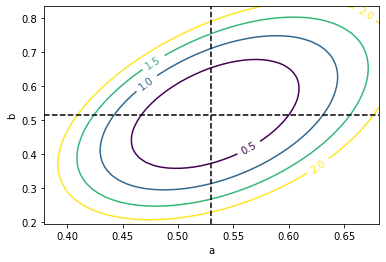

In [123]:
m.draw_contour('a','b');